In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 공연장 – 예매건수 간의 EDA분석

### 공연장수 대비 예매건수 평균 = 총 예매건수 / (총 공연건수 / 근처 공연장수) 
#### **근처 공연장 기준 3km 이내

In [4]:
df=pd.read_excel('./datacam/서울 지하철역 마스터시트.xlsx')
df.head()

,역사명,자치구,역위도,역경도,역사도로명주소,근처 공연장수,공연건수,예매건수,17~18,18~19,19~20,20~21,21~22,22~23,23~00,00~01,신용판매금액,문화예술관람
0,가락시장,송파구,37.49277,127.1179,서울특별시 송파구 송파대로 지하 257 (가락동),3,144,314120,476217,663040,488463,313033,271287,226994,119854,42662,1801,4.8
1,가산디지털단지,금천구,37.48122,126.8826,서울특별시 금천구 벚꽃로 309 (가산동),7,52,18582,442850,517071,378598,210506,178233,158238,88510,12391,1092,7.0
2,강남,강남구,37.49720,127.0281,서울특별시 강남구 강남대로 지하 396 (역삼동),32,717,729016,1977673,2692598,1675368,776469,616089,499771,278888,6168,2326,9.0
3,강남구청,강남구,37.51715,127.0412,서울특별시 강남구 학동로 지하346 (삼성동),32,166,254494,252239,283839,189187,119943,101025,72930,48880,6570,2326,9.0
4,강동,강동구,37.53588,127.1321,서울특별시 강동구 천호대로 지하1097 (천호동),3,31,30650,530373,843039,703247,421328,401196,370305,225776,26819,1518,4.1


In [6]:
df['공연장수 대비 예매건수 평균']=df['예매건수']/(df['공연건수']/df['근처 공연장수'])
df.to_csv('./Intel/subway.csv',header = False, index = False, encoding='utf-8-sig')

In [7]:
df.set_index('역사명', inplace=True)

In [8]:
df['공연장수 대비 예매건수 평균']

역사명
가락시장         6544.166667
가산디지털단지      2501.423077
강남          32536.278940
강남구청        49059.084337
강동           2966.129032
               ...      
홍제            579.562005
화곡                   NaN
화랑대          4693.000000
회현         114347.552941
효창공원앞       25577.780488
Name: 공연장수 대비 예매건수 평균, Length: 234, dtype: float64

In [9]:
from matplotlib import font_manager, rc

font_path = 'c:/Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

<AxesSubplot:>

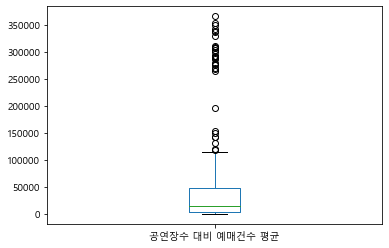

In [10]:
df['공연장수 대비 예매건수 평균'].plot.box()

Text(0.5, 1.0, '자치구별 예매수')

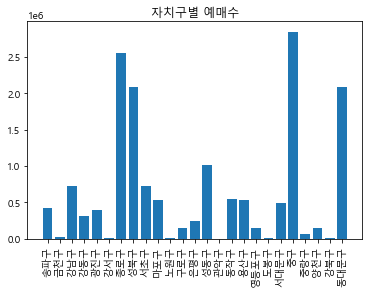

In [11]:
plt.bar(df['자치구'],df['예매건수'])
plt.xticks(rotation=90)
plt.title('자치구별 예매수')

In [12]:
송파구=df[df['자치구']=='송파구']
금천구=df[df['자치구']=='금천구']
강남구=df[df['자치구']=='강남구']
강동구=df[df['자치구']=='강동구']

광진구=df[df['자치구']=='광진구']
강서구=df[df['자치구']=='강서구']
종로구=df[df['자치구']=='종로구']
성북구=df[df['자치구']=='성북구']

서초구=df[df['자치구']=='서초구']
마포구=df[df['자치구']=='마포구']
노원구=df[df['자치구']=='노원구']
구로구=df[df['자치구']=='구로구']

은평구=df[df['자치구']=='은평구']
성동구=df[df['자치구']=='성동구']
관악구=df[df['자치구']=='관악구']
동작구=df[df['자치구']=='동작구']

용산구=df[df['자치구']=='용산구']
영등포구=df[df['자치구']=='영등포구']
도봉구=df[df['자치구']=='도봉구']
서대문구=df[df['자치구']=='서대문구']

중구=df[df['자치구']=='중구']
중랑구=df[df['자치구']=='중랑구']
양천구=df[df['자치구']=='양천구']
강북구=df[df['자치구']=='강북구']

동대문구=df[df['자치구']=='동대문구']

## 역별 공연장수 대비 예매건수 평균(red=평균이하 green=평균이상)

In [ ]:
'''
그래프를 통해 예매건수가 비교적 많은 역들을 알아본다.
자치구별로 예매건수가 많은 역을 선택할지, 전체 역 중 예매건수 상위 역을 선택할지 알아본다.
자치구별로 하기에는 지역 별로 차이가 심함
ex.(강남구 최하위역>강서구 최상위역)들이 있으므로 전체 역 중 예매건수 상위 50개역을 기준으로 채택
'''

Text(0.5, 1.0, '금천구 역별 한 공연당 예매건수')

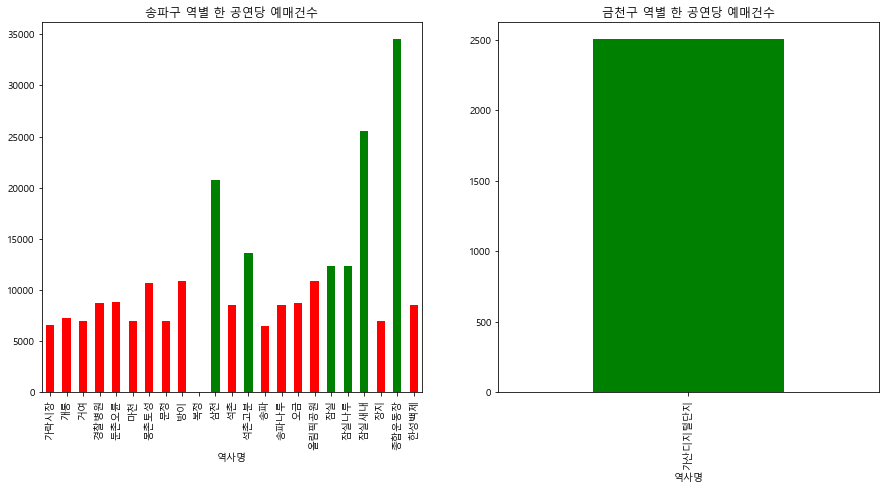

In [27]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
송파구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 송파구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 송파구['공연장수 대비 예매건수 평균']])
plt.title('송파구 역별 한 공연당 예매건수')

plt.subplot(222)
금천구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 금천구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 금천구['공연장수 대비 예매건수 평균']])
plt.title('금천구 역별 한 공연당 예매건수')

plt.subplot(223)
강남구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 강남구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 강남구['공연장수 대비 예매건수 평균']])
plt.title('강남구 역별 한 공연당 예매건수')

plt.subplot(224)
강동구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 강동구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 강동구['공연장수 대비 예매건수 평균']])
plt.title('강동구 역별 한 공연당 예매건수')

Text(0.5, 1.0, '성북구 역별 한 공연당 예매건수')

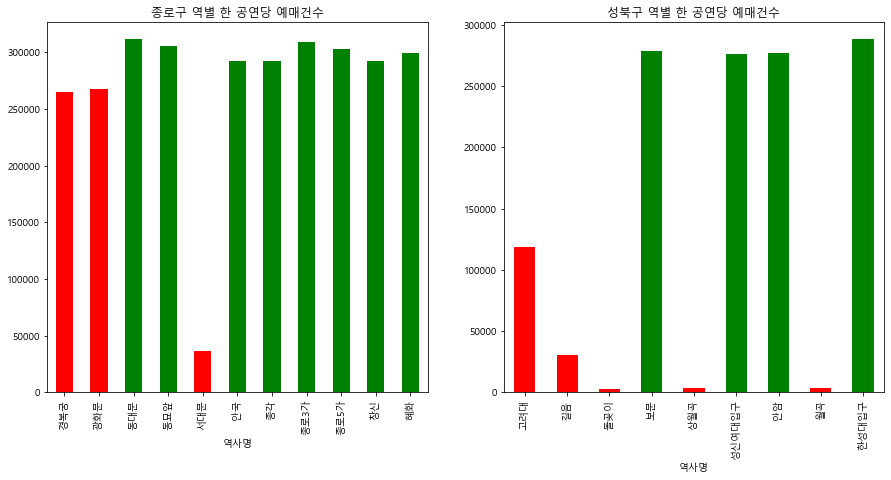

In [18]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
광진구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 광진구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 광진구['공연장수 대비 예매건수 평균']])
plt.title('광진구 역별 한 공연당 예매건수')

plt.subplot(222)
강서구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 강서구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 강서구['공연장수 대비 예매건수 평균']])
plt.title('강서구 역별 한 공연당 예매건수')

plt.subplot(223)
종로구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 종로구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 종로구['공연장수 대비 예매건수 평균']])
plt.title('종로구 역별 한 공연당 예매건수')

plt.subplot(224)
성북구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 성북구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 성북구['공연장수 대비 예매건수 평균']])
plt.title('성북구 역별 한 공연당 예매건수')

Text(0.5, 1.0, '구로구 역별 한 공연당 예매건수')

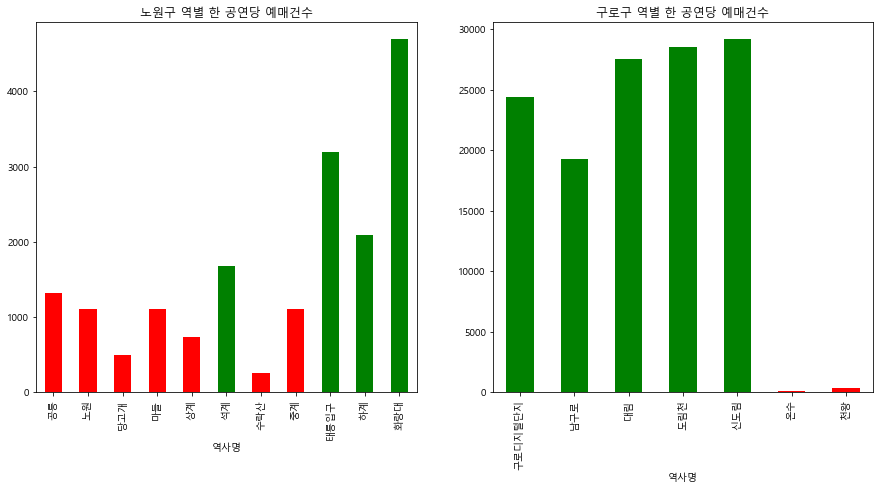

In [20]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
서초구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 서초구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 서초구['공연장수 대비 예매건수 평균']])
plt.title('서초구 역별 한 공연당 예매건수')

plt.subplot(222)
마포구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 마포구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 마포구['공연장수 대비 예매건수 평균']])
plt.title('마포구 역별 한 공연당 예매건수')

plt.subplot(223)
노원구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 노원구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 노원구['공연장수 대비 예매건수 평균']])
plt.title('노원구 역별 한 공연당 예매건수')

plt.subplot(224)
구로구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 구로구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 구로구['공연장수 대비 예매건수 평균']])
plt.title('구로구 역별 한 공연당 예매건수')

Text(0.5, 1.0, '동작구 역별 한 공연당 예매건수')

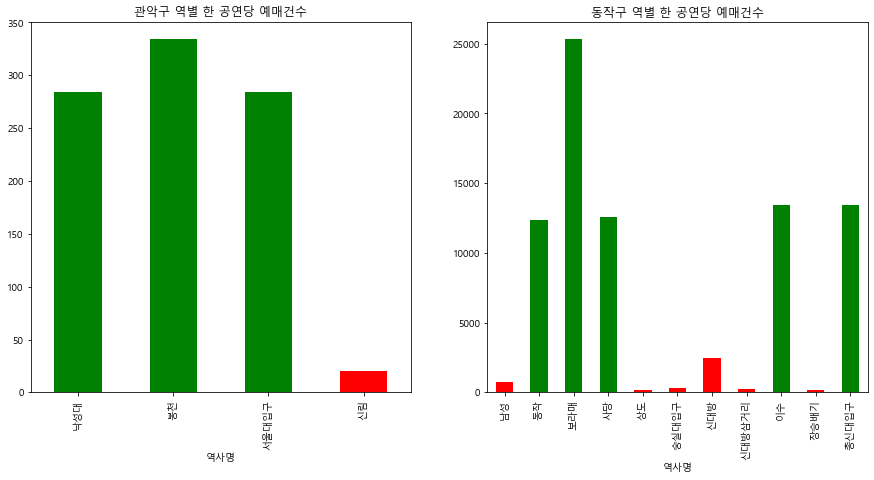

In [22]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
은평구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 은평구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 은평구['공연장수 대비 예매건수 평균']])
plt.title('은평구 역별 한 공연당 예매건수')

plt.subplot(222)
성동구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 성동구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 성동구['공연장수 대비 예매건수 평균']])
plt.title('성동구 역별 한 공연당 예매건수')

plt.subplot(223)
관악구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 관악구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 관악구['공연장수 대비 예매건수 평균']])
plt.title('관악구 역별 한 공연당 예매건수')

plt.subplot(224)
동작구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 동작구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 동작구['공연장수 대비 예매건수 평균']])
plt.title('동작구 역별 한 공연당 예매건수')

Text(0.5, 1.0, '서대문구 역별 한 공연당 예매건수')

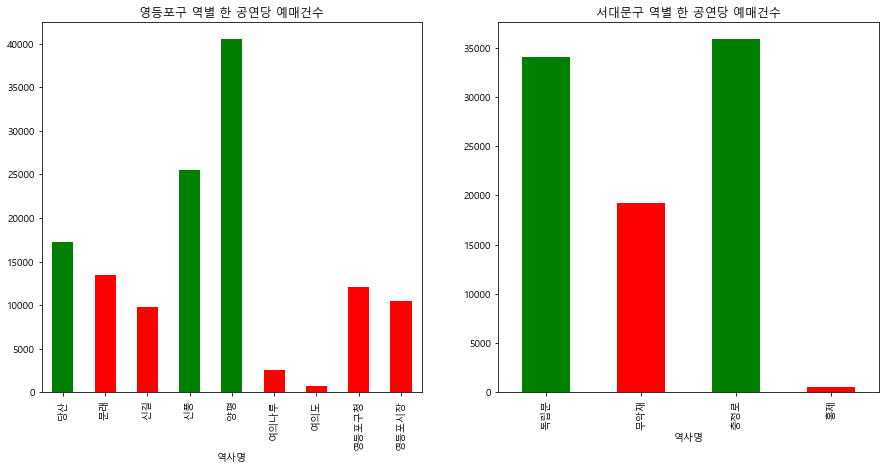

In [24]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
용산구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 용산구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 용산구['공연장수 대비 예매건수 평균']])
plt.title('용산구 역별 한 공연당 예매건수')

plt.subplot(222)
도봉구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 도봉구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 도봉구['공연장수 대비 예매건수 평균']])
plt.title('도봉구 역별 한 공연당 예매건수')

plt.subplot(223)
영등포구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 영등포구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 영등포구['공연장수 대비 예매건수 평균']])
plt.title('영등포구 역별 한 공연당 예매건수')

plt.subplot(224)
서대문구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 서대문구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 서대문구['공연장수 대비 예매건수 평균']])
plt.title('서대문구 역별 한 공연당 예매건수')

Text(0.5, 1.0, '강북구 역별 한 공연당 예매건수')

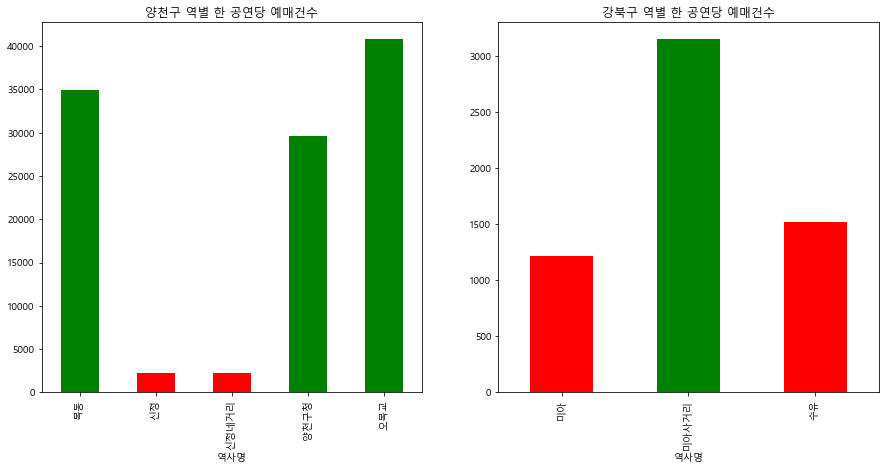

In [26]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
중구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 중구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 중구['공연장수 대비 예매건수 평균']])
plt.title('중구 역별 한 공연당 예매건수')

plt.subplot(222)
중랑구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 중랑구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 중랑구['공연장수 대비 예매건수 평균']])
plt.title('중랑구 역별 한 공연당 예매건수')

plt.subplot(223)
양천구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 양천구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 양천구['공연장수 대비 예매건수 평균']])
plt.title('양천구 역별 한 공연당 예매건수')

plt.subplot(224)
강북구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 강북구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 강북구['공연장수 대비 예매건수 평균']])
plt.title('강북구 역별 한 공연당 예매건수')

Text(0.5, 1.0, '동대문구 역별 한 공연당 예매건수')

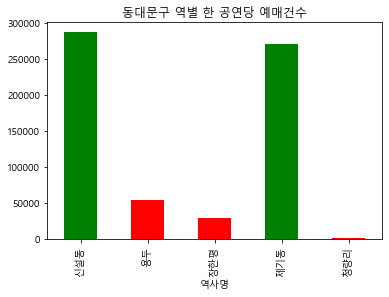

In [16]:
동대문구['공연장수 대비 예매건수 평균'].plot.bar(
    color=['r' if 동대문구['공연장수 대비 예매건수 평균'].mean()>v else 'g' for v in 동대문구['공연장수 대비 예매건수 평균']])
plt.title('동대문구 역별 한 공연당 예매건수')

In [17]:
average=[]
for i in df['공연장수 대비 예매건수 평균']:
    average.append(i)

In [18]:
num = pd.Series(average)
Q1 = num.describe()['25%']  # Q1 은 백분위수에서 25%
Q2 = num.describe()['50%']  # Q2 (중앙값) 백분위수 50%
Q3 = num.describe()['75%']  # Q3 은 백분위수에서 75%

print("Q1  :",Q1)
print("Q2  :",Q2)
print("Q3  :",Q3)

Q1  : 2966.1290322580644
Q2  : 15196.458450046684
Q3  : 47781.59418022528


In [20]:
A=[]
B=[]
C=[]
D=[]
for i in average:
    if i<=Q1:
        #print(f.index)
        D.append(df['공연장수 대비 예매건수 평균']==i)
    elif i>Q1 and i<=Q2:
        C.append(df['공연장수 대비 예매건수 평균']==i)
    elif i>Q2 and i<=Q3:
        B.append(df['공연장수 대비 예매건수 평균']==i)
    else:
        A.append(df['공연장수 대비 예매건수 평균']==i)